## Bribe and Voting report for graviAURA all rounds

---

[Llama Airforce Link](https://llama.airforce/#/bribes/rounds/hh/aura-bal/)



In [9]:
import pandas as pd
from IPython.core.display_functions import display

from notebooks.aura_bribes.aura_data import VOTING_ROUNDS

TABLE_COLUMNS = ["Voting Round", "Total graviAURA bought in $", "Total BADGER bought in $", "graviAURA bought", "BADGER bought",
                 "$/vlAURA total", "$/vlAURA pure bribes", "$/vlAURA Llama", "vlAURA difference"]

data_rows = []
for voting_round in VOTING_ROUNDS:
    llama_vlaura = voting_round['llama_vlaura']
    badger_vlaura = voting_round['$/vlAURA without pools']
    difference_with_llama = round(
        abs(badger_vlaura - llama_vlaura) / ((llama_vlaura + badger_vlaura) / 2) * 100, 3
    )
    data_rows.append([
        voting_round['round'], voting_round['total_graviaura_bought_in_$'], voting_round['total_badger_bought_in_$'],
        voting_round['amount_graviaura_bought'], voting_round['amount_badger_bought'], voting_round['$/vlAURA for total votes'],
        voting_round['$/vlAURA without pools'], voting_round['llama_vlaura'], difference_with_llama
    ])
data_rows.reverse()
dataframe = pd.DataFrame(data=data_rows, columns=TABLE_COLUMNS)
display(dataframe)


,Voting Round,Total graviAURA bought in $,Total BADGER bought in $,graviAURA bought,BADGER bought,$/vlAURA total,$/vlAURA pure bribes,$/vlAURA Llama,vlAURA difference
0,29th September 2022,22640.234,7509.109,11853.53,2013.17,0.033,0.064,0.063,1.575
1,15th September 2022,25066.2,8618.6,12227.39,2427.75,0.037,0.064,0.066,3.077
2,1st September 2022,26371.21,8983.14,8618.04,2133.76,0.04,0.069,0.08562,21.498


## Overall $/vlAURA data

Display performance of Badger graviAURA over different voting rounds

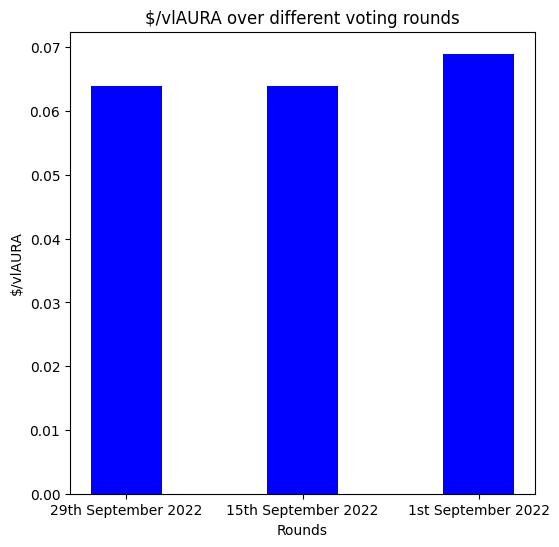

In [10]:
import matplotlib.pyplot as plt

rounds = [dataset[0] for dataset in data_rows]
vlauras = [float(dataset[6]) for dataset in data_rows]

fig = plt.figure(figsize=(6, 6))

# creating the bar plot
plt.bar(rounds, vlauras, color='blue', width=0.4)

plt.xlabel("Rounds")
plt.ylabel("$/vlAURA")
plt.title("$/vlAURA over different voting rounds")
plt.show()

## Overall bribes harvested in $


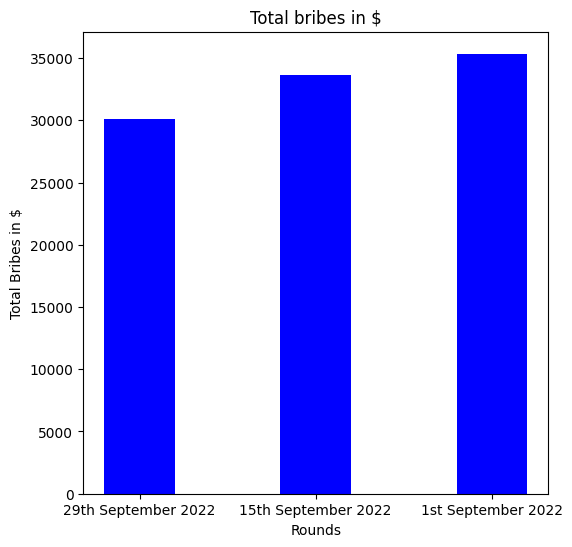

In [11]:
import matplotlib.pyplot as plt

rounds = [dataset[0] for dataset in data_rows]
total_bribes = [float(dataset[1] + dataset[2]) for dataset in data_rows]

fig_total = plt.figure(figsize=(6, 6))

# creating the bar plot
plt.bar(rounds, total_bribes, color='blue', width=0.4)

plt.xlabel("Rounds")
plt.ylabel("Total Bribes in $")
plt.title("Total bribes in $")
plt.show()